# Training Data Visualization 

In [4]:
# Importing packages 
from os import path

import pandas as pd

import numpy as np 

from openpyxl import load_workbook

import csv

import sys
sys.path.append("../..")
from DexterousManipulation.training.data_loader import load_filtered_sequences, load_data_two_classes_seq

In [5]:
# Plotting session 
plot_session = 1

In [6]:
data_loc = r"C:\Users\phili\Documents\GitHub\DexterousManipulation\Figures\Training\YCB_Data_Set\seq_len_10"

In [8]:
data_500_ep = load_workbook(data_loc+"\Log_loss_acc_training_50_nb_epochs_500.xlsx")
data_100_ep = load_workbook(data_loc+"\Log_loss_acc_training_10_nb_epochs_100.xlsx")

data_sheet_500_ep = data_500_ep.active
data_sheet_100_ep = data_100_ep.active

In [9]:
# Declaring data 
epochs_500 = [] 
training_losses_500 = [] 
validation_losses_500 = []
training_accs_500 = [] 
validation_accs_500 = [] 

epochs_100 = [] 
training_losses_100 = [] 
validation_losses_100 = []
training_accs_100 = [] 
validation_accs_100 = [] 

In [11]:
# Function for loading from a xlsx file 
def load_from_xlsx(data_sheet): 
    epochs = [] 
    training_losses = [] 
    validation_losses = [] 
    training_accs = [] 
    validation_accs = [] 
    line_counter = 2
    while data_sheet.cell(line_counter, 1).value !=  None: 
        epochs.append(int(data_sheet.cell(line_counter, 1).value))
        training_losses.append(float(data_sheet.cell(line_counter, 2).value))
        validation_losses.append(float(data_sheet.cell(line_counter, 3).value))
        training_accs.append(float(data_sheet.cell(line_counter, 4).value)*100)
        validation_accs.append(float(data_sheet.cell(line_counter, 5).value)*100)
        line_counter += 1 
    
    return epochs, training_losses, validation_losses, training_accs, validation_accs 

In [12]:
epochs_500, training_losses_500, validation_losses_500, training_accs_500, validation_accs_500 = load_from_xlsx(data_sheet_500_ep)
epochs_100, training_losses_100, validation_losses_100, training_accs_100, validation_accs_100 = load_from_xlsx(data_sheet_100_ep)

## Plotting the data 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [15]:
import seaborn as sns
sns.set()

In [16]:
def plot_losses(epochs, training_losses, validation_losses, folder_name, title): 
    # Plotting the losses 
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(epochs, training_losses, label = "training loss")
    plt.plot(epochs, validation_losses, label = "validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Categorical Crossentropy")
    plt.title(title)
    plt.legend(loc='upper right')
    plt.savefig(folder_name + "/training_validation_losses_plot_" + str(len(epochs)) + "_epochs_V" + str(plot_session) +".png")
    plt.show()

In [17]:
def plot_accuracies(epochs, training_accs, validation_loss, folder_name, title):
    # Plotting the accuracies  
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(epochs, training_accs, label = "training accuracy")
    plt.plot(epochs, validation_loss, label = "validation accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Categorical accuracy")
    plt.title(title)
    plt.legend(loc='lower right')
    plt.savefig(folder_name + "/training_validation_accuracies_plot_" + str(len(epochs)) + "_epochs_V" + str(plot_session) +".png")
    plt.show()

Training and validation loss: 500 epochs


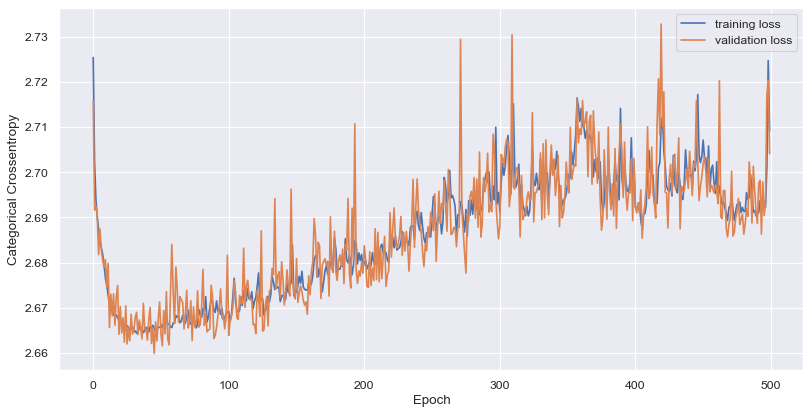

Training and validation accuracy: 500 epochs


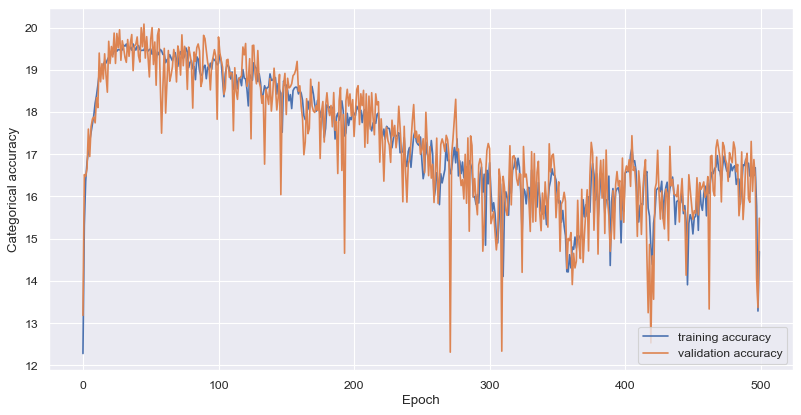

Highest validation accuracy achieved:  20.082889349385276


In [19]:
print("Training and validation loss: 500 epochs")
plot_losses(epochs_500, training_losses_500, validation_losses_500, data_loc, "")
print("Training and validation accuracy: 500 epochs")
plot_accuracies(epochs_500, training_accs_500, validation_accs_500, data_loc, "")
print("Highest validation accuracy achieved: ", max(validation_accs_500))

Training and validation loss: 100 epochs


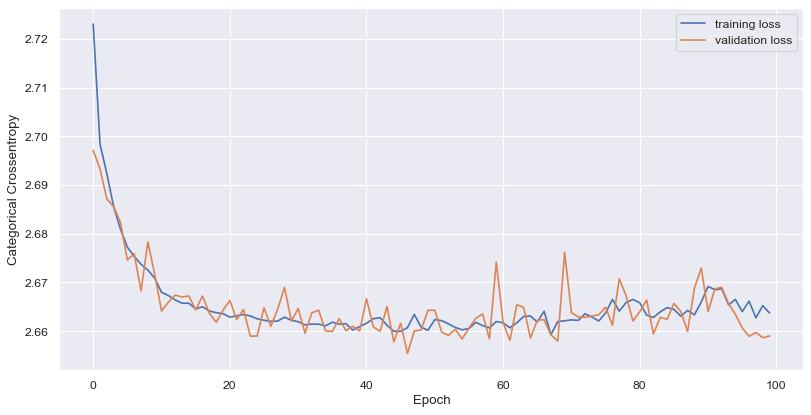

Training and validation accuracy: 100 epochs


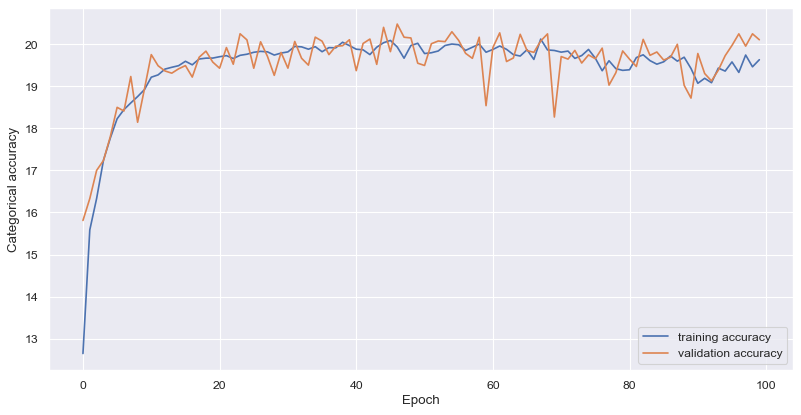

Highest validation accuracy achieved:  20.082889349385276


In [20]:
print("Training and validation loss: 100 epochs")
plot_losses(epochs_100, training_losses_100, validation_losses_100, data_loc, "")
print("Training and validation accuracy: 100 epochs")
plot_accuracies(epochs_100, training_accs_100, validation_accs_100, data_loc, "")
print("Highest validation accuracy achieved: ", max(validation_accs_500))